In [292]:
# This file provide a basic exploration of given house price dataset
import numpy as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [293]:
df_train = pd.read_csv('./../data/train.csv')
df_test = pd.read_csv('./../data/test.csv')

In [294]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [295]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [296]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [297]:
df_train.columns.to_series().groupby(df_train.dtypes).groups

{dtype('int64'): Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
        'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
       dtype='object'),
 dtype('float64'): Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object'),
 dtype('O'): Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 

In [298]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [299]:
train_sale_price = df_train['SalePrice']
train_sale_price

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
         ...  
1430    192140
1431    143750
1432     64500
1433    186500
1434    160000
1435    174000
1436    120500
1437    394617
1438    149700
1439    197000
1440    191000
1441    149300
1442    310000
1443    121000
1444    179600
1445    129000
1446    157900
1447    240000
1448    112000
1449     92000
1450    136000
1451    287090
1452    145000
1453     84500
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [300]:
train_gr_live_area = df_train['GrLivArea']
train_gr_live_area

0       1710
1       1262
2       1786
3       1717
4       2198
5       1362
6       1694
7       2090
8       1774
9       1077
10      1040
11      2324
12       912
13      1494
14      1253
15       854
16      1004
17      1296
18      1114
19      1339
20      2376
21      1108
22      1795
23      1060
24      1060
25      1600
26       900
27      1704
28      1600
29       520
        ... 
1430    1838
1431     958
1432     968
1433    1792
1434    1126
1435    1537
1436     864
1437    1932
1438    1236
1439    1725
1440    2555
1441     848
1442    2007
1443     952
1444    1422
1445     913
1446    1188
1447    2090
1448    1346
1449     630
1450    1792
1451    1578
1452    1072
1453    1140
1454    1221
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1460, dtype: int64

In [301]:
train_sale_price.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [302]:
train_gr_live_area.describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

In [303]:
#Plotting saleprice
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)

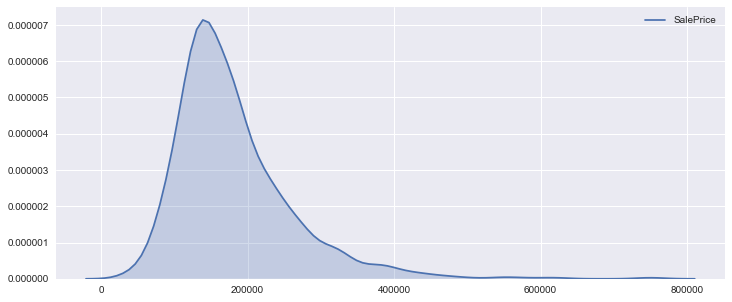

In [304]:
plt.figure(figsize=(12,5))
sns.kdeplot(train_sale_price, shade=True);

In [305]:
train_correlation = df_train.corr()
train_correlation

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


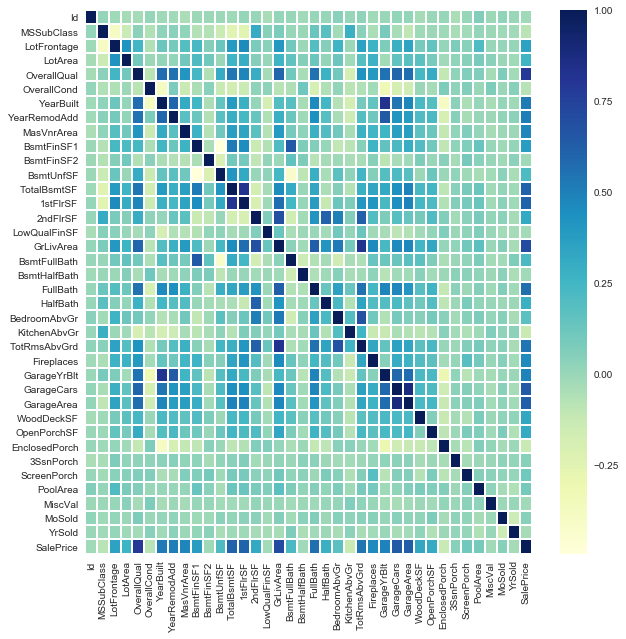

In [306]:
#Coorelation Map to analysis the how features are related 
sns.set()
plt.subplots(figsize=(10,10))
sns.heatmap(train_correlation, linewidths= 1, cmap="YlGnBu");

In [307]:
#Top 10 Correlation Matrix with SalePrice
top_10_correlation_labels = train_correlation.nlargest(10, 'SalePrice')['SalePrice'].index
top_10_correlation_labels

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [308]:
#Top 10 Correlation Matrix with SalePrice
top_10_correlation_list = train_correlation['SalePrice'].sort_values(axis=0,ascending=False).iloc[1:10]
top_10_correlation_list

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

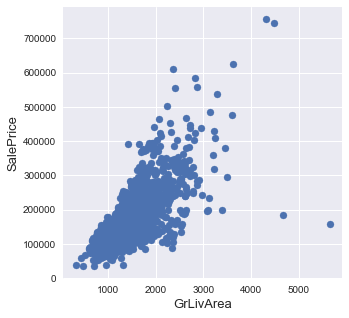

In [332]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(x = df_train['GrLivArea'], y = train_sale_price)
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [310]:
#Now we know the Nature of Target Value, Correlation between Target and Features. So Start Data Prep for model training.
#First Drop ID since this is not related feature of saleprice
train_ID = df_train['Id']
test_ID = df_test['Id']

In [311]:
#Concatenate the train and test data in same data-frame
#So that we can apply same preparation for all features 
#Take Note of train and test so that we can separate after data prep for train
ntrain = df_train.shape[0]
#Take the ‘SalePrice’ Value
targetSalePrice = df_train['SalePrice']
df_traintest = pd.concat((df_train,df_test)).reset_index(drop=True)
print("After Concat of train and test {}".format(df_traintest.shape))

After Concat of train and test (2919, 81)


In [312]:
#Check the missing Data
#Get percent of Null data per column which is more than ZERO percentage
df_traintest_na = df_traintest.isnull().sum()/len(df_traintest)*100
df_traintest_na =  df_traintest_na.drop(df_traintest_na[df_traintest_na==0].index).sort_values(ascending=False)
print(df_traintest_na)

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
SalePrice       49.982871
FireplaceQu     48.646797
LotFrontage     16.649538
GarageQual       5.447071
GarageCond       5.447071
GarageFinish     5.447071
GarageYrBlt      5.447071
GarageType       5.378554
BsmtExposure     2.809181
BsmtCond         2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrType       0.822199
MasVnrArea       0.787941
MSZoning         0.137033
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
Utilities        0.068517
Functional       0.068517
Electrical       0.034258
BsmtUnfSF        0.034258
Exterior1st      0.034258
Exterior2nd      0.034258
TotalBsmtSF      0.034258
GarageCars       0.034258
BsmtFinSF2       0.034258
BsmtFinSF1       0.034258
KitchenQual      0.034258
SaleType         0.034258
GarageArea       0.034258
dtype: float64


Text(0.5,1,'Percentage missing data by feature')

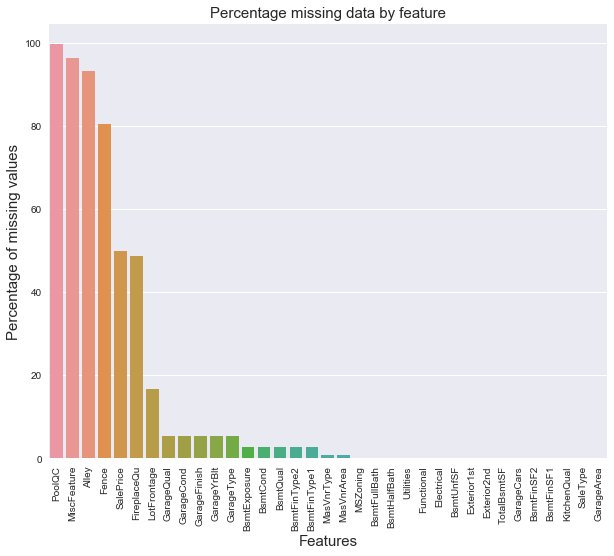

In [313]:
#And then plot of Percent Missing Data by feature
features, percentage = plt.subplots(figsize=(10,8))
plt.xticks(rotation='90')
sns.barplot(x=df_traintest_na.index, y=df_traintest_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percentage of missing values', fontsize=15)
plt.title('Percentage missing data by feature', fontsize=15)

In [314]:
#Missing Data for Some Features are simply means this house don't have this feature
#So we will assign "None" 
for feature in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MSSubClass'):
    df_traintest[feature] = df_traintest[feature].fillna('None')

In [315]:
#Measurement or count of Missing Features are simply means 
#this house don't have this feature So we will assign Zero
for feature_related in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea'):
    df_traintest[feature_related] = df_traintest[feature_related].fillna(0)

In [316]:
#LotFrontage :  Linear feet of street connected to property
#Since the distance between the house and street might be the same for most house in same #neighborhood so take the mean of this feature value for same neighbourhood and fill those 
df_traintest["LotFrontage"] = df_traintest.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
print(df_traintest['MSZoning'].describe())

count     2915
unique       5
top         RL
freq      2265
Name: MSZoning, dtype: object


In [317]:
#MSZoning: Identifies the general zoning classification of the sale.
#Based on describe() 'RL' is the most freq, so we fill with 'RL' for those NA
df_traintest['MSZoning'] = df_traintest['MSZoning'].fillna(df_traintest['MSZoning'].mode()[0])

In [318]:
#Some features are not really related for SalesPrice in this context
#For Example, YrSold and MoSold can't really relate with SalePrice by themselves alone
#Since we don't have another feature that tell us what happen around 
#that house area on that year and month
#We drops some feature that not contribute the SalePrice
df_traintest = df_traintest.drop(['YrSold'], axis=1)
df_traintest = df_traintest.drop(['MoSold'], axis=1)
df_traintest = df_traintest.drop(['Utilities'], axis=1)

In [319]:
#Functional: Home functionality (Assume typical unless deductions are warranted)
#we take Functional 'NA' means it's typical
df_traintest["Functional"] = df_traintest["Functional"].fillna("Typ")

In [320]:
#Electrical: Electrical system
#Based on describe() 'SBrkr' is the most freq, so we fill with 'SBrkr' for those NA
df_traintest['Electrical'] = df_traintest['Electrical'].fillna(df_traintest['Electrical'].mode()[0])
print(df_traintest['Electrical'].describe())

count      2919
unique        5
top       SBrkr
freq       2672
Name: Electrical, dtype: object


In [321]:
#Same for the following features since those have only one or two NA 
#So we fill in with the most common value
df_traintest['KitchenQual'] = df_traintest['KitchenQual'].fillna(df_traintest['KitchenQual'].mode()[0])
df_traintest['Exterior1st'] = df_traintest['Exterior1st'].fillna(df_traintest['Exterior1st'].mode()[0])
df_traintest['Exterior2nd'] = df_traintest['Exterior2nd'].fillna(df_traintest['Exterior2nd'].mode()[0])
df_traintest['SaleType'] = df_traintest['SaleType'].fillna(df_traintest['SaleType'].mode()[0])

In [322]:
#MSSubClass: Identifies the type of dwelling involved in the sale.
#NA for MSSubClass means simply says this house dont have the class or
#not in tht list of category so we fill with None
df_traintest['MSSubClass'] = df_traintest['MSSubClass'].fillna("None")

In [323]:
#Some features are numerical but they have actual meaning behind numerical
#For Example, 'MSSubClass' feature 20	means '1-STORY 1946 & NEWER ALL STYLES'
#So we havve to change these feature to category so that it will consider
#correctly when we feed the data to model

#MSSubClass=The building class
df_traintest['MSSubClass'] = df_traintest['MSSubClass'].apply(str)

# Same for 'OverallQual' and 'OverallCond' since the number applied to category
df_traintest['OverallQual'] = df_traintest['OverallQual'].astype(str)
df_traintest['OverallCond'] = df_traintest['OverallCond'].astype(str)

In [324]:
#We will transform all the category data to numeric value so that we can feed to model
#We decide to use the labelEncoder which will give the numeric value of each of 
#the category for all individual feature
#For Example
#So get all the Object Type Features
category_cols = [key for key in dict(df_traintest.dtypes) if dict(df_traintest.dtypes)[key] in ['object']]
for c in category_cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df_traintest[c].values)) 
    df_traintest[c] = lbl.transform(list(df_traintest[c].values))

In [326]:
#Separate the train and test after all features applied equally
df_featured_train =  df_traintest[:ntrain]
df_featured_test = df_traintest[ntrain:]
print("After feature applied train shape {}".format(len(df_featured_train)))
print("After feature applied train shape {}".format(len(df_featured_test)))

After feature applied train shape 1460
After feature applied train shape 1459
